# Glass Clasification
---

EL objetivo del problema es clasificar que tipo de vidrio es un base a su composición quimica

In [179]:
import numpy as np
import pandas as pd

In [180]:
#Cargamos nuestro dataset
ds=pd.read_csv("../data/glass.data")
ds.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Como podemos ver no tenemos los headers, vamos a agregarselos

In [181]:
#Creamos el array de headers
headers=['id','ri','na','mg','al','si','k','ca','ba','fe','class']

#Agregamos los headers al dataset
ds.columns=headers

#verificamos si el dataset quedo con los headers
ds.head()

,id,ri,na,mg,al,si,k,ca,ba,fe,class
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


Vamos a eliminar el identificador ya que en este problema no es util.

In [182]:
ds.drop(columns=['id'],axis=1,inplace=True)
ds.head()

,ri,na,mg,al,si,k,ca,ba,fe,class
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [183]:
#Contamos cuantas istancias tenemos en nuestro dataset
print("Training data instances count:\t",ds.shape[0])

Training data instances count:	 213


vamos a ver los tipo de datos de nuestro dataset

In [184]:
#Chequeamos los tipo de datos de nuestro dataset
ds.dtypes

ri       float64
na       float64
mg       float64
al       float64
si       float64
k        float64
ca       float64
ba       float64
fe       float64
class      int64
dtype: object

In [185]:
#Obtenemos las magnitudes estadistcas de nuestro dataset
ds.describe()

,ri,na,mg,al,si,k,ca,ba,fe,class
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [186]:
#ds['class'] = ds.class.replace()

ds['class']=ds['class'].map({  
   1:'building_windows_float_processed',
   2:'building_windows_non_float_processed',
   3:'vehicle_windows_float_processed',
   5:'containers',
   6:'tableware',
   7:'headlamps'
})

ds.head()

,ri,na,mg,al,si,k,ca,ba,fe,class
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,building_windows_float_processed
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,building_windows_float_processed
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,building_windows_float_processed
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,building_windows_float_processed
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,building_windows_float_processed


# Missing Values
---
una vez que chequeamos los tipo de datos de nuestro dataset vamos a busar datos faltantes, 
para ellos mostraremos todos los posibles valores que pueden tomar nuestro dataset.
Vamos a entrenar un árbol de desición con esto datos, no es necesario que hagamos el estudio
de valores faltantes o outliers, aún así vamos a seguir las buenas practicas y hacer una revisión de
los mismos.

In [187]:
#Creamos una funcion para imprimir ls diferentes valores que toman nuestras columnas
def unique_value(dataset):
    for column in dataset:
        print( "\n#### %s ####" % dataset[column].name)
        print(dataset[column].unique())

##Verificamos nuestros datos para cada atributo
unique_value(ds)


#### ri ####
[1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918 1.51755
 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735 1.5175
 1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768 1.51747
 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779 1.5221
 1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926 1.51808
 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977 1.52172
 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631 1.5159
 1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625 1.51569
 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811 1.51655
 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222 1.51818
 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708 1.51673
 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667 1.52081
 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711 1.51674
 1.5169  1.51851 1.51662 1.51709 1.5166 

Como podemos observar no tenemos ningun dato faltante.

# Outliers
---
Como primer paso vamos a revisar la correlación entre atributotis mediante la matriz de correlación.

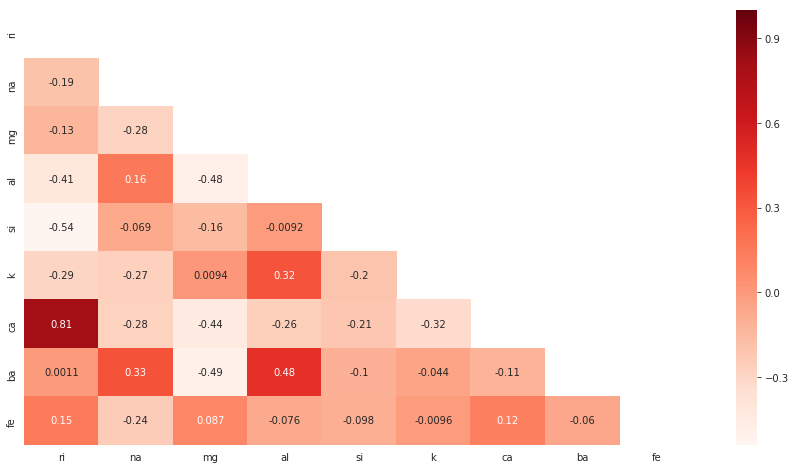

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

#Creamos una función para imprimir la matriz de correlacion.
def printCorrelationMatrix(dataset):
    plt.figure(figsize=(15,8))
    correlation=ds.corr()
    mask = np.zeros_like(correlation)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(correlation, mask=mask,cmap="Reds",annot=True)
        
printCorrelationMatrix(ds)


####### ri #######


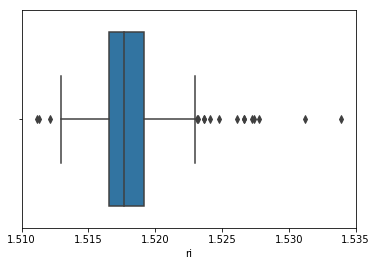


####### na #######


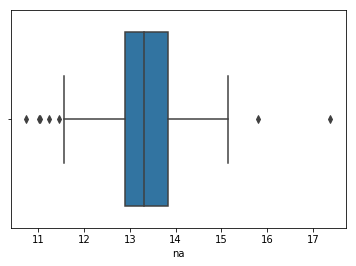


####### mg #######


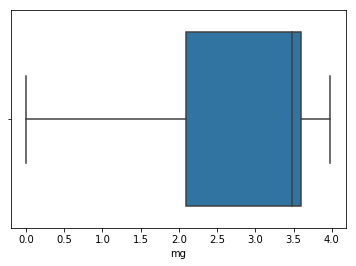


####### al #######


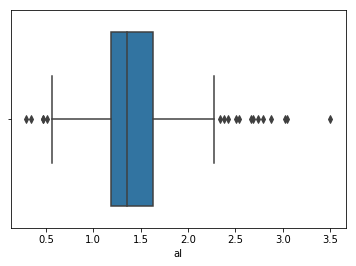


####### si #######


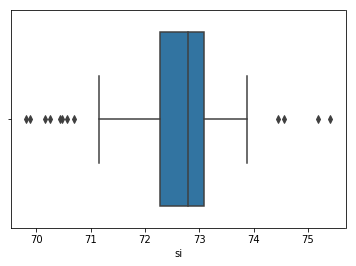


####### k #######


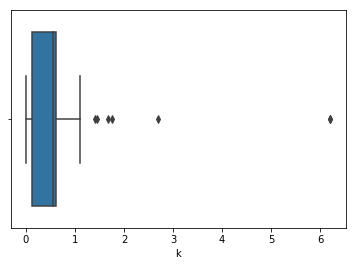


####### ca #######


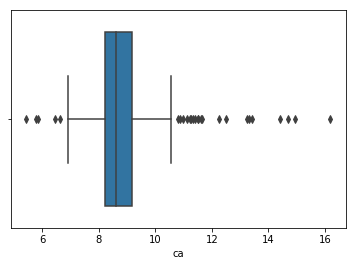


####### ba #######


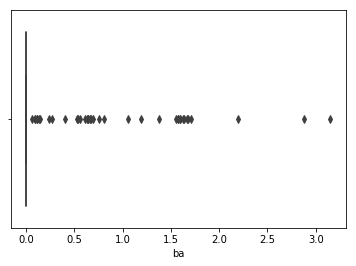


####### fe #######


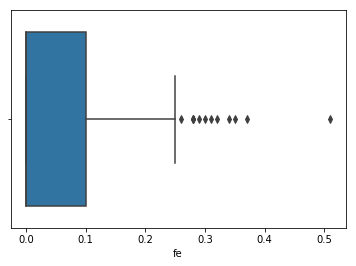

In [189]:
#Ahora vamos a ver los diagramas de caja atribut por atributo, descartanto la clase
def printBoxplot(dataset):
    for column in dataset.columns:
        print("\n####### "+str(column)+" #######")
        sns.boxplot(dataset[column])
        plt.show()
printBoxplot(ds.drop(columns=['class'],axis=1))

In [190]:
#vamos a chequear los percentiles
ds.quantile([0.25,0.5,0.75,0.95])

,ri,na,mg,al,si,k,ca,ba,fe
0.25,1.516520,12.900,2.090,1.190,72.28,0.13,8.240,0.00,0.000
0.50,1.517680,13.300,3.480,1.360,72.79,0.56,8.600,0.00,0.000
0.75,1.519150,13.830,3.600,1.630,73.09,0.61,9.180,0.00,0.100
0.95,1.523666,14.854,3.844,2.396,73.52,0.76,11.566,1.57,0.268


# Entrenamiento y Evaluación del modelo

In [191]:
from sklearn import tree
from sklearn import model_selection

#Quito la variable de predicción
X= np.array(ds.drop(['class'],1))

#Me quedo con la variable de predicción
Y = np.array(ds['class'])

#Ajusto el tamaño de los datos para test
validation_size = 0.25

#Utilizo una semilla para poder reproducir el split
seed = 2018

#Hago un split para validar el modelo
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size=validation_size, random_state=seed)

#Defino el KFold
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#Definó el modelo de árbol de desición
model = tree.DecisionTreeClassifier()

#Obtengo los resultados del entrenamiento 
results = model_selection.cross_val_score(model, X_train,Y_train, cv=kfold, scoring='accuracy',)
print("#### Resultado Training ####\n")
print("Media: %f" % (results.mean()))
print("Desvio Estandar: %f" % (results.std()))

#### Resultado Training ####

Media: 0.672083
Desvio Estandar: 0.130318


In [192]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Lo ajusto a los datos de entrenamiento
model.fit(X_train, Y_train)

#Hago las preciiones sbre los datos de Validacion
predictions = model.predict(X_validation)

#Agregó el scoring a un array para luego hacer una gráfica
accuracy=accuracy_score(Y_validation, predictions)

#imprimimos el Accurcy
print("\nAccuracy: %s\n" % accuracy)

#imprimimos otras metricas del model
print(classification_report(Y_validation, predictions))


Accuracy: 0.6666666666666666

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.71      0.75      0.73        16
building_windows_non_float_processed       0.70      0.80      0.74        20
                          containers       1.00      1.00      1.00         1
                           headlamps       0.86      0.67      0.75         9
                           tableware       0.50      0.33      0.40         3
     vehicle_windows_float_processed       0.00      0.00      0.00         5

                           micro avg       0.67      0.67      0.67        54
                           macro avg       0.63      0.59      0.60        54
                        weighted avg       0.66      0.67      0.66        54



# Data Visualization

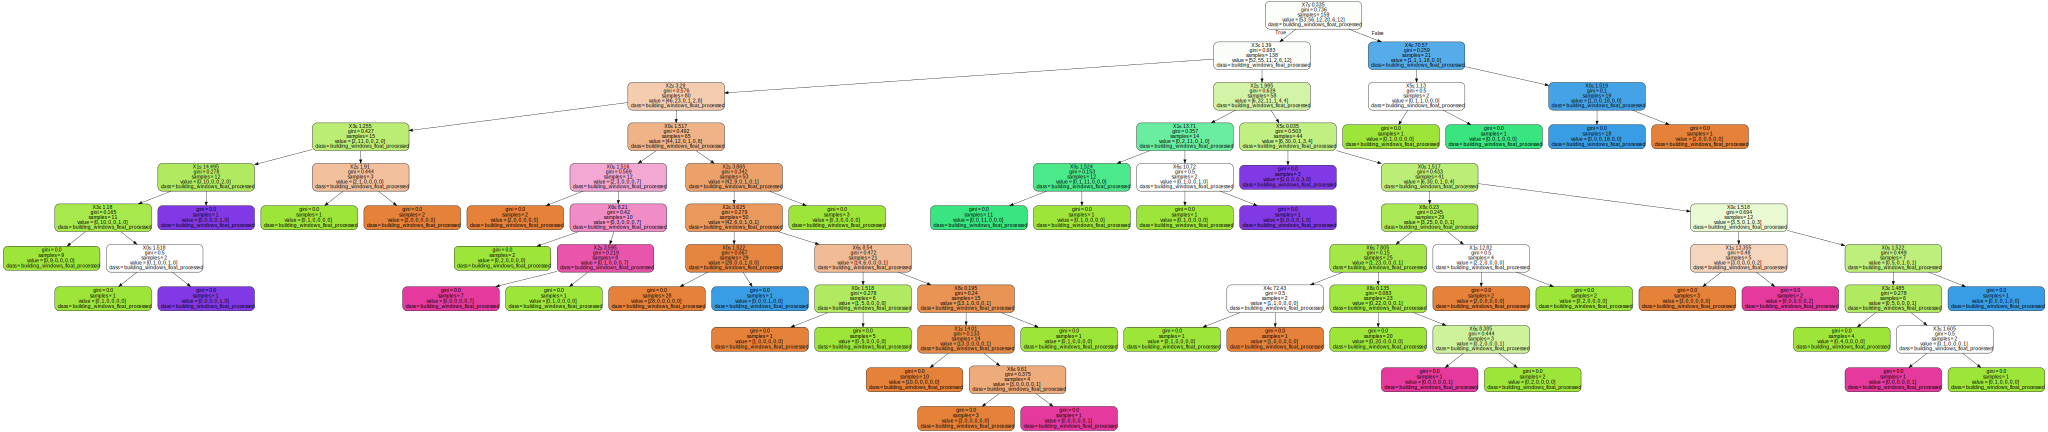

In [193]:
from sklearn.tree import export_graphviz
graph_data = export_graphviz(model,filled=True, rounded=True,special_characters=True,class_names=ds['class'])  
graph = graphviz.Source(graph_data)
graph